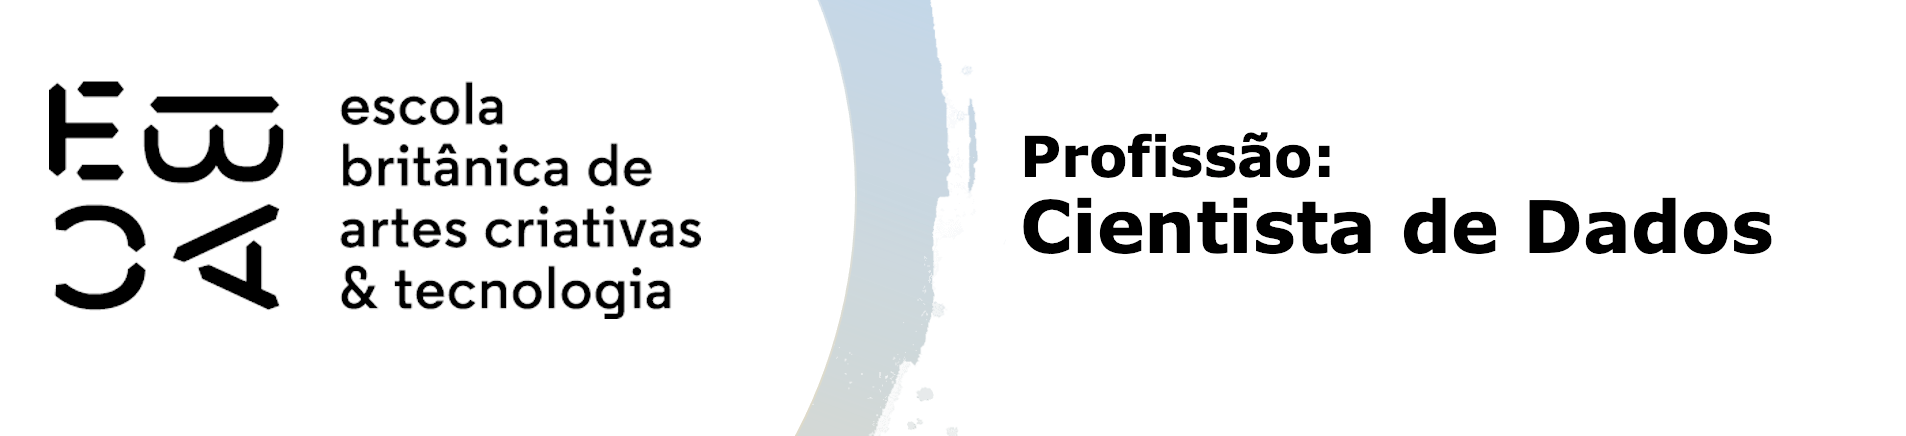

# Métodos hierárquicos de agrupamento - Tarefa

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings("ignore")

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [166]:
df = sns.load_dataset('penguins')
df.index.name='id'
df_pad = df.select_dtypes('number').dropna()
df_num = StandardScaler().fit_transform(df_pad)
df_num

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [167]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = cluster.fit_predict(df_num)

In [168]:
df_num = pd.DataFrame(df_num)

In [169]:
df_num['grupo'] = cluster.labels_
df_num

,0,1,2,3,grupo
0,-0.884499,0.785449,-1.418347,-0.564142,1
1,-0.811126,0.126188,-1.062250,-0.501703,1
2,-0.664380,0.430462,-0.421277,-1.188532,1
3,-1.324737,1.089724,-0.563715,-0.938776,1
4,-0.847812,1.748985,-0.777373,-0.689020,1
...,...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175,0
338,0.527932,-1.445897,1.003109,0.809516,0
339,1.188289,-0.735923,1.501644,1.933419,0
340,0.234440,-1.192335,0.789451,1.246590,0


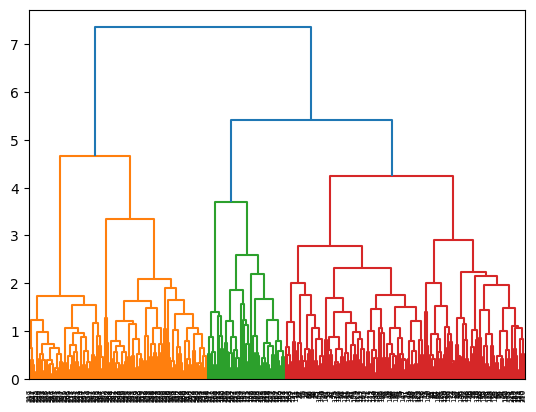

In [170]:
dend = shc.dendrogram(shc.linkage(df_num, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [171]:
count = df_num['grupo'].value_counts().sort_index()
count

grupo
0    123
1    165
2     54
Name: count, dtype: int64

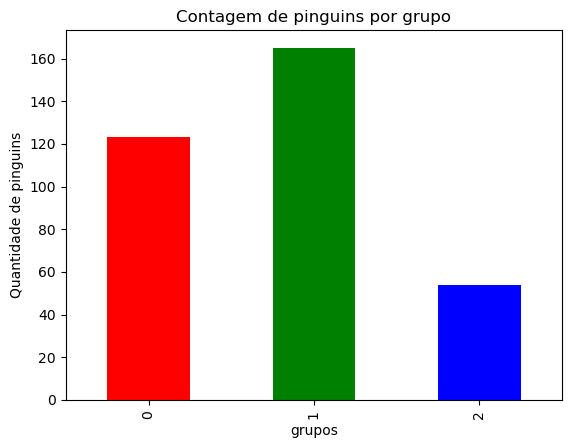

In [172]:
count.plot(kind='bar', color=['red', 'green', 'blue'])
plt.xlabel('grupos')
plt.ylabel('Quantidade de pinguins')
plt.title('Contagem de pinguins por grupo')
plt.show()

In [173]:
pd.crosstab(df['species'], df_num['grupo'])

grupo,0,1,2
species,,,
Adelie,0,151,1
Chinstrap,1,14,53
Gentoo,122,0,0


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [174]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='complete', distance_threshold=None)
clustering.fit(df_pad)
df_num['subgrupo'] = clustering.labels_
df_num

,0,1,2,3,grupo,subgrupo
0,-0.884499,0.785449,-1.418347,-0.564142,1,1
1,-0.811126,0.126188,-1.062250,-0.501703,1,1
2,-0.664380,0.430462,-0.421277,-1.188532,1,3
3,-1.324737,1.089724,-0.563715,-0.938776,1,1
4,-0.847812,1.748985,-0.777373,-0.689020,1,1
...,...,...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175,0,4
338,0.527932,-1.445897,1.003109,0.809516,0,4
339,1.188289,-0.735923,1.501644,1.933419,0,0
340,0.234440,-1.192335,0.789451,1.246590,0,4


In [177]:
count_sub = df_num['subgrupo'].value_counts().sort_index()
count

subgrupo
0     42
1    132
2     79
3     50
4     39
Name: count, dtype: int64

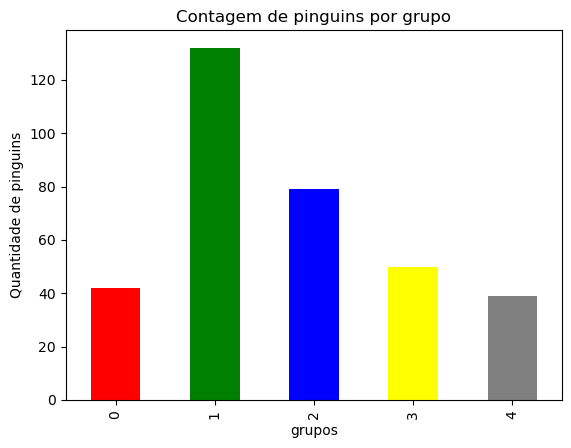

In [179]:
count_sub.plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'grey'])
plt.xlabel('grupos')
plt.ylabel('Quantidade de pinguins')
plt.title('Contagem de pinguins por grupo')
plt.show()

Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?


sex,Female,Male
subgrupo,,
0,33,4
1,65,64
2,42,36
3,6,42
4,18,21



Tabela cruzada percentual:


species   Adelie         Chinstrap        Gentoo       
sex       Female    Male    Female   Male Female   Male
subgrupo                                               
0          0.00%   0.00%     0.00%  0.00%  9.97%  1.21%
1         12.69%  11.48%     6.95%  7.25%  0.00%  0.60%
2          8.16%   0.60%     2.72%  0.30%  1.81%  9.97%
3          1.21%   9.97%     0.60%  2.72%  0.00%  0.00%
4          0.00%   0.00%     0.00%  0.00%  5.44%  6.34%

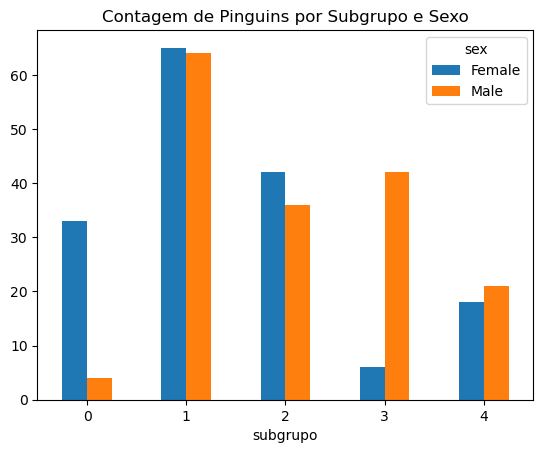

In [180]:
df_ = df_num.merge(right=df[['sex', 'species']], how='left', left_index=True, right_index=True)

contagem_subgrupo_sex = (df_[['subgrupo', 'sex']].value_counts().unstack().fillna(0).astype(int))

print('Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?')

display(contagem_subgrupo_sex)

print('\nTabela cruzada percentual:')

tabela_cruzada_percentual = pd.crosstab(index=[df_['subgrupo'], df_['sex']], columns=df_['species'], normalize=True) * 100
tabela_cruzada_percentual = tabela_cruzada_percentual.unstack().fillna(0)

display(tabela_cruzada_percentual.applymap(lambda x: f'{x:.2f}%'))

contagem_subgrupo_sex.plot(kind='bar')

plt.title('Contagem de Pinguins por Subgrupo e Sexo')
plt.xticks(rotation=0)
plt.show()

<blockquote>Essa classificação indica que o agrupamento conseguiu identificar padrões naturais nos dados, uma vez que os grupos distinguem os pinguins de acordo com suas características de espécie e sexo. Por exemplo, o "Grupo 0" contém pinguins da espécie Chinstrap, tanto machos quanto fêmeas, enquanto o "Grupo 1" é predominantemente composto por pinguins Gentoo do sexo masculino. Isso sugere que o agrupamento conseguiu segmentar os pinguins com base em características biológicas distintas. No entanto, a interpretação final desse resultado vai depender do objetivo e do contexto específico da análise.</blockquote>